In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading data.
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_features.csv')

In [3]:
print(f'Training Data shape:{train_data.shape}\n')
print(f'Training Data types:\n{train_data.dtypes.value_counts()}')

train_data.head()

Training Data shape:(113, 22)

Training Data types:
float64    19
object      2
bool        1
dtype: int64


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
print(f'Testing Data shape:{test_data.shape}\n')
print(f'Testing Data types:\n{test_data.dtypes.value_counts()}')
test_data.head()

Testing Data shape:(33, 21)

Testing Data types:
float64    19
object      2
dtype: int64


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [5]:
# 將訓練目標從訓練的資料裡面提取出來
train_Y = train_data['poi']
train_Y.shape

(113,)

In [6]:
# 將訓練目標從訓練資料裡面剃除
train_X = train_data.drop(['poi'], axis=1)
train_X.shape

(113, 21)

In [7]:
# 先處理數值欄位，剃除類別欄位
str_data = pd.DataFrame()
val_data = pd.DataFrame()

for col in train_X.columns:
    if train_X[col].dtype == np.object:
        str_data[col] = train_X[col]
    else:
        val_data[col] = train_X[col]

In [8]:
str_data.head()

,name,email_address
0,RICE KENNETH D,ken.rice@enron.com
1,SKILLING JEFFREY K,jeff.skilling@enron.com
2,SHELBY REX,rex.shelby@enron.com
3,KOPPER MICHAEL J,michael.kopper@enron.com
4,CALGER CHRISTOPHER F,christopher.calger@enron.com


In [9]:
val_data.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [10]:
# 因為類別型欄位為 name 與 email，相異性都很高，所以採用 Hash Encoding
for col in str_data.columns:
    str_data[col] = str_data[col].map(lambda x: hash(x)%5)
    
str_data.head()

,name,email_address
0,0,1
1,1,0
2,2,0
3,0,3
4,3,3


In [11]:
# Nan 處理(float64 用中位數處理)
for col in val_data.columns:
    q_50 = np.percentile(val_data[~val_data[col].isnull()][col], q=50)
    val_data.loc[val_data[col].isnull(), col] = q_50

# 檢查是否還有 Nan 存在
val_data.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,195190.0,-3504386.0,108579.0,19794175.0,46950.0,18.0,42.0,4.0,40962500.0,1617011.0,174839.0,2748364.0,-139856.5,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,195190.0,-117534.0,108579.0,19250000.0,29336.0,108.0,88.0,30.0,40962500.0,1920000.0,22122.0,6843672.0,-139856.5,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,195190.0,-4167.0,108579.0,1624396.0,22884.0,39.0,13.0,14.0,40962500.0,422158.0,1573324.0,869220.0,-139856.5,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,195190.0,-117534.0,108579.0,850010.0,118134.0,45.0,28.0,7.0,40962500.0,602671.0,907502.0,985032.0,-139856.5,224305.0,599.0,1088.0,2652612.0,985032.0
4,1250000.0,195190.0,-262500.0,108579.0,850010.0,35818.0,144.0,199.0,25.0,40962500.0,375304.0,486.0,126027.0,-139856.5,240189.0,2188.0,2598.0,1639297.0,126027.0


In [12]:
# 測試優化前的分數
LogRes = LogisticRegression()
print(f'Logistic Regression score: {cross_val_score(LogRes, val_data, train_Y, cv=5).mean()}')

Logistic Regression score: 0.8312252964426877


/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

count    1.130000e+02
mean     9.645453e+05
std      1.119509e+06
min      7.000000e+04
25%      7.000000e+05
50%      7.500000e+05
75%      7.500000e+05
max      8.000000e+06
Name: bonus, dtype: float64



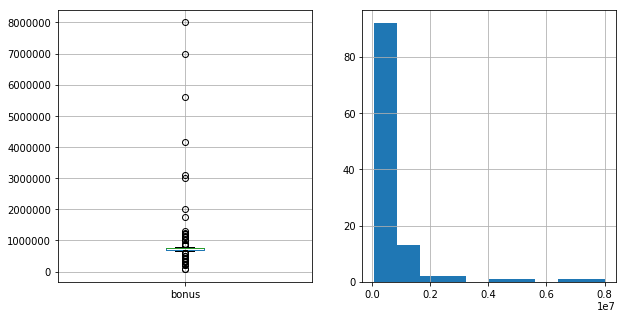

count    1.130000e+02
mean     3.040301e+05
std      4.633900e+05
min     -1.025000e+05
25%      1.951900e+05
50%      1.951900e+05
75%      1.951900e+05
max      2.964506e+06
Name: deferral_payments, dtype: float64



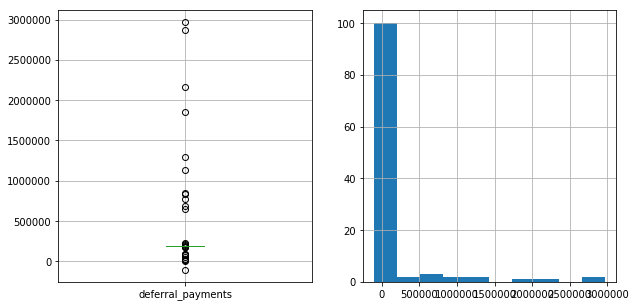

count    1.130000e+02
mean    -2.213490e+05
std      4.672910e+05
min     -3.504386e+06
25%     -1.175340e+05
50%     -1.175340e+05
75%     -1.175340e+05
max     -1.042000e+03
Name: deferred_income, dtype: float64



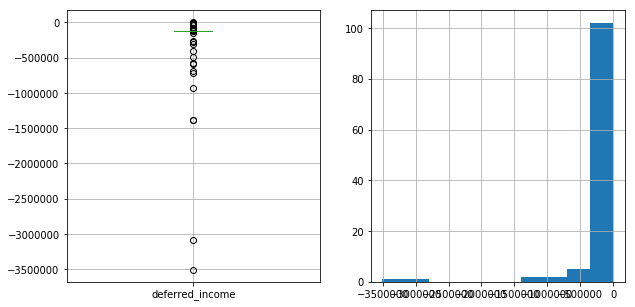

count       113.000000
mean     106372.318584
std       14804.081677
min        3285.000000
25%      108579.000000
50%      108579.000000
75%      108579.000000
max      125034.000000
Name: director_fees, dtype: float64



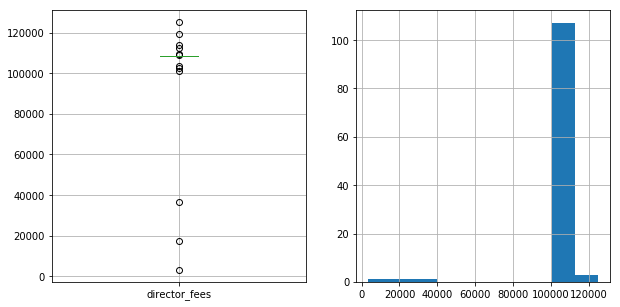

count    1.130000e+02
mean     2.380459e+06
std      5.165625e+06
min      3.285000e+03
25%      6.078370e+05
50%      8.500100e+05
75%      1.624396e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64



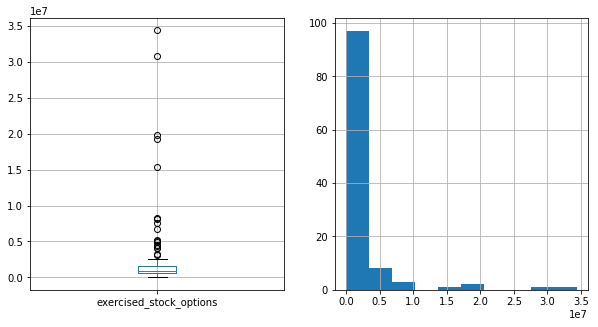

count       113.000000
mean      47823.716814
std       38411.074880
min         148.000000
25%       29336.000000
50%       41953.000000
75%       50080.000000
max      228763.000000
Name: expenses, dtype: float64



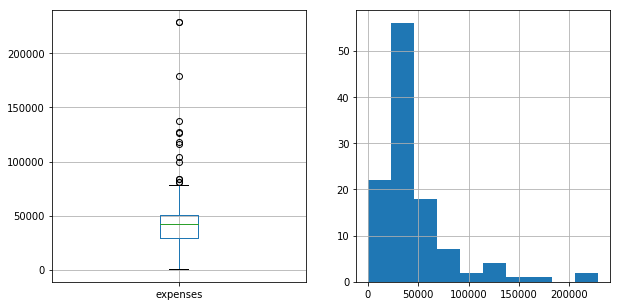

count      113.000000
mean       428.283186
std       1602.691171
min         12.000000
25%         40.000000
50%         45.000000
75%         59.000000
max      14368.000000
Name: from_messages, dtype: float64



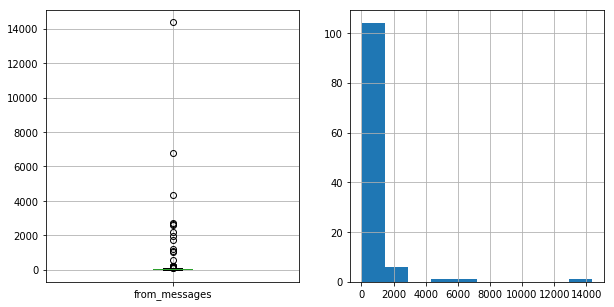

count    113.000000
mean      49.168142
std       71.805653
min        0.000000
25%       24.000000
50%       28.000000
75%       37.000000
max      528.000000
Name: from_poi_to_this_person, dtype: float64



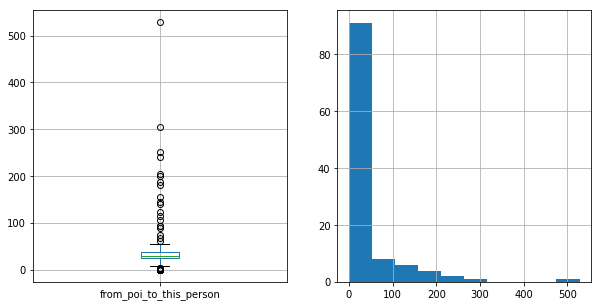

count    113.000000
mean      26.035398
std       69.182591
min        0.000000
25%        5.000000
50%        7.000000
75%       11.000000
max      411.000000
Name: from_this_person_to_poi, dtype: float64



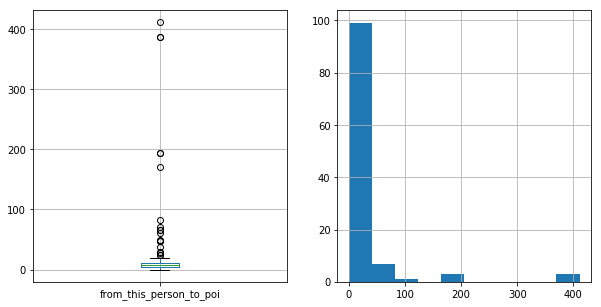

count    1.130000e+02
mean     4.096250e+07
std      5.420392e+06
min      4.000000e+05
25%      4.096250e+07
50%      4.096250e+07
75%      4.096250e+07
max      8.152500e+07
Name: loan_advances, dtype: float64



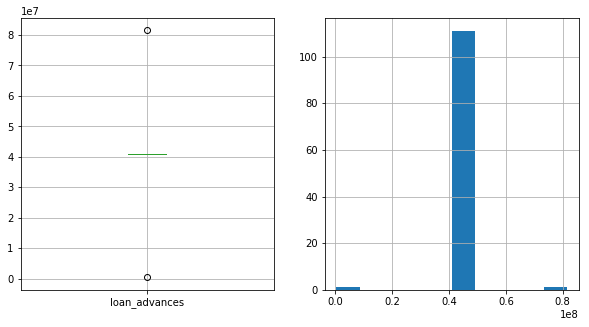

count    1.130000e+02
mean     5.827996e+05
std      6.489764e+05
min      7.102300e+04
25%      4.221580e+05
50%      4.221580e+05
75%      4.221580e+05
max      5.145434e+06
Name: long_term_incentive, dtype: float64



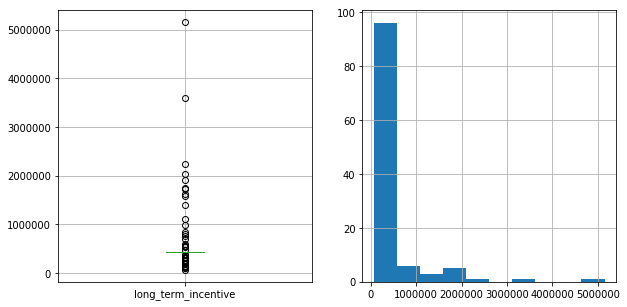

count    1.130000e+02
mean     2.934517e+05
std      1.063072e+06
min      2.000000e+00
25%      3.083000e+03
50%      5.238200e+04
75%      1.111220e+05
max      1.035973e+07
Name: other, dtype: float64



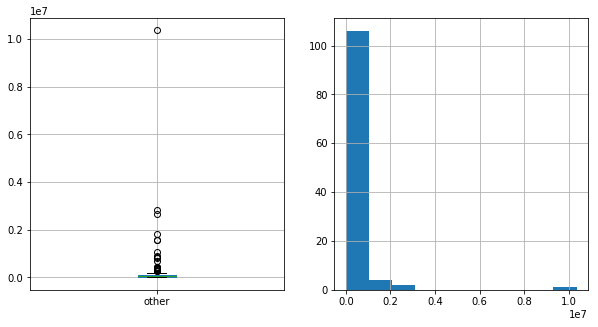

count    1.130000e+02
mean     1.066598e+06
std      2.157109e+06
min      4.409300e+04
25%      3.780820e+05
50%      4.628225e+05
75%      6.982420e+05
max      1.476169e+07
Name: restricted_stock, dtype: float64



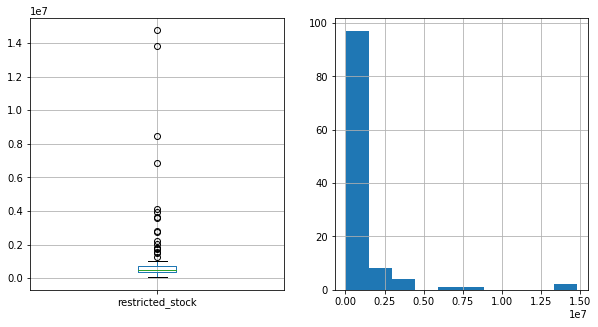

count       113.000000
mean    -147115.721239
std       62697.168678
min     -560222.000000
25%     -139856.500000
50%     -139856.500000
75%     -139856.500000
max       44093.000000
Name: restricted_stock_deferred, dtype: float64



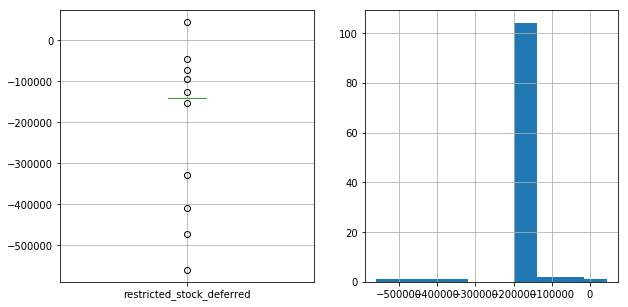

count    1.130000e+02
mean     2.660269e+05
std      1.380522e+05
min      4.770000e+02
25%      2.395020e+05
50%      2.516540e+05
75%      2.652140e+05
max      1.111258e+06
Name: salary, dtype: float64



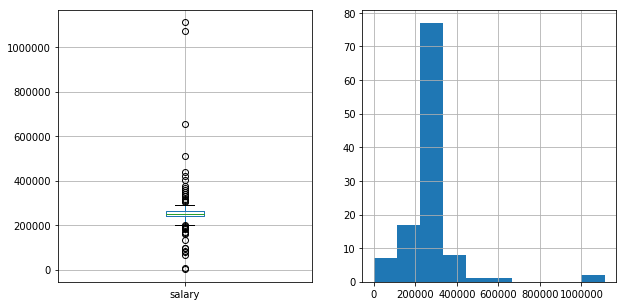

count     113.000000
mean      893.725664
std       917.283940
min         2.000000
25%       552.000000
50%       599.000000
75%       742.000000
max      4527.000000
Name: shared_receipt_with_poi, dtype: float64



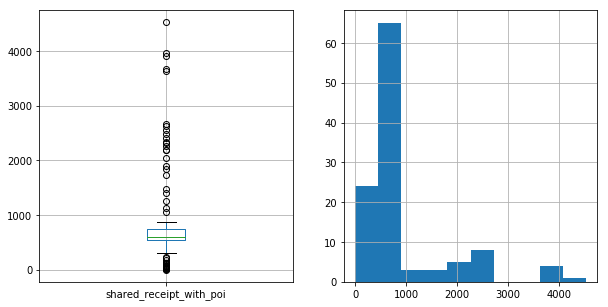

count      113.000000
mean      1702.371681
std       2190.585836
min         57.000000
25%        898.000000
50%       1088.000000
75%       1433.000000
max      15149.000000
Name: to_messages, dtype: float64



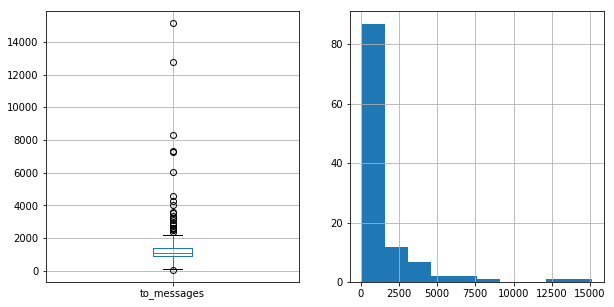

count    1.130000e+02
mean     2.367685e+06
std      9.746128e+06
min      1.480000e+02
25%      5.050500e+05
50%      1.106740e+06
75%      1.747522e+06
max      1.035598e+08
Name: total_payments, dtype: float64



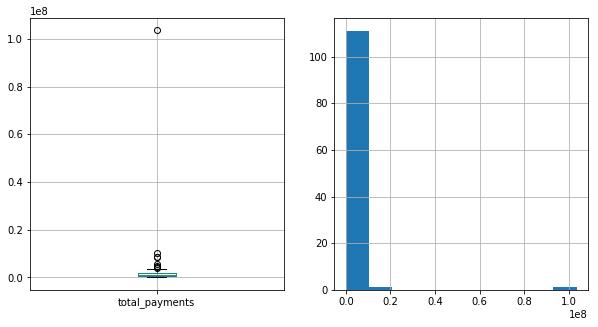

count    1.130000e+02
mean     3.191406e+06
std      6.740053e+06
min     -4.409300e+04
25%      5.117340e+05
50%      9.979710e+05
75%      2.072035e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64



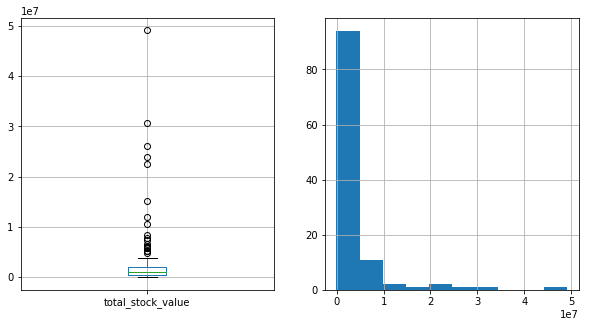

In [13]:
# 檢測 float64 的資料分佈, 使用 boxplot 與 hist.
%matplotlib inline

for col in val_data.columns:
    print(f'{val_data[col].describe()}\n')
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    val_data.boxplot(col)
    plt.subplot(1, 2, 2)
    val_data[col].hist()
    plt.show()

* 使用 boxplot 與 hist 發現下面幾個現象：

* 1. 均為偏態分佈

* 2. 存在 Outlier：
* (1). deferred_income
* (2). director_fees
* (3). exercised_stock_options
* (4). from_messages
* (5). from_poi_to_this_person
* (6). from_this_person_to_poi
* (7). other
* (8). total_payments
* (9). total_stock_value

In [14]:
# 處理 Outlier，採用的方法為將區間限定在 10%~90% 之間
for col in val_data.columns:
    q_90 = np.percentile(val_data[~val_data[col].isnull()][col], q=90)
    q_10 = np.percentile(val_data[~val_data[col].isnull()][col], q=10)
    val_data.loc[val_data[col] > q_90, col] = q_90
    val_data.loc[val_data[col] < q_10, col] = q_10

count    1.130000e+02
mean     7.522002e+05
std      2.247919e+05
min      3.600000e+05
25%      7.000000e+05
50%      7.500000e+05
75%      7.500000e+05
max      1.190000e+06
Name: bonus, dtype: float64



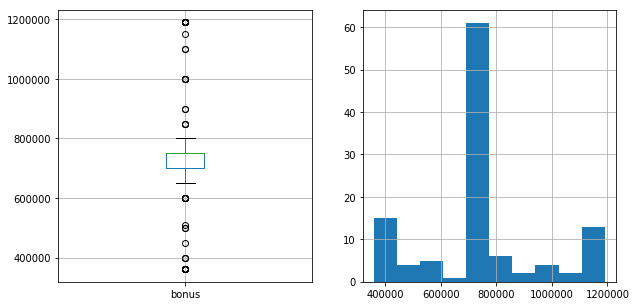

count       113.000000
mean     196978.493805
std       10794.710947
min      181802.600000
25%      195190.000000
50%      195190.000000
75%      195190.000000
max      224894.800000
Name: deferral_payments, dtype: float64



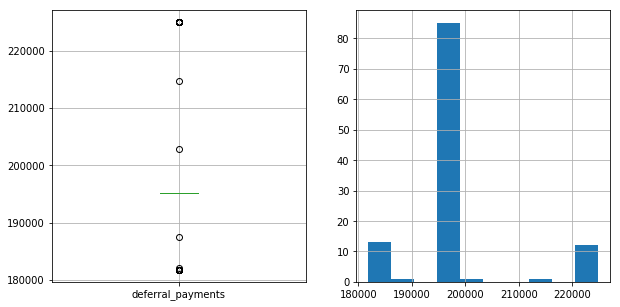

count       113.000000
mean    -131325.805310
std       64745.146442
min     -296000.000000
25%     -117534.000000
50%     -117534.000000
75%     -117534.000000
max      -48000.000000
Name: deferred_income, dtype: float64



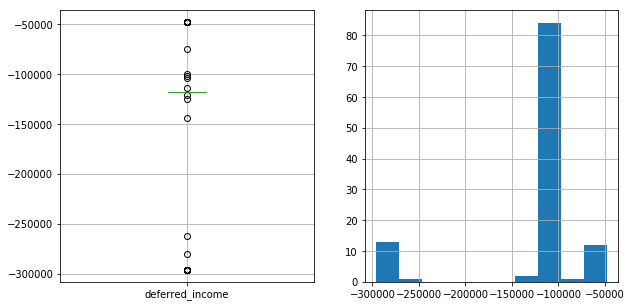

count       113.0
mean     108579.0
std           0.0
min      108579.0
25%      108579.0
50%      108579.0
75%      108579.0
max      108579.0
Name: director_fees, dtype: float64



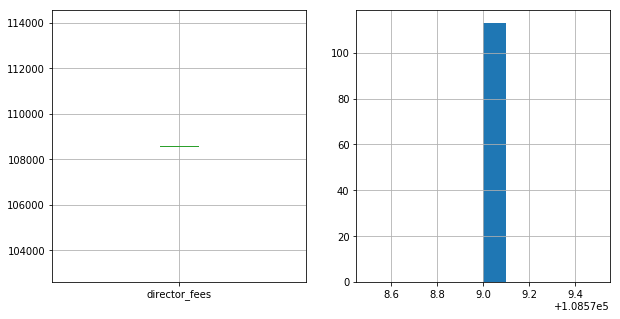

count    1.130000e+02
mean     1.436770e+06
std      1.441821e+06
min      1.855504e+05
25%      6.078370e+05
50%      8.500100e+05
75%      1.624396e+06
max      4.802770e+06
Name: exercised_stock_options, dtype: float64



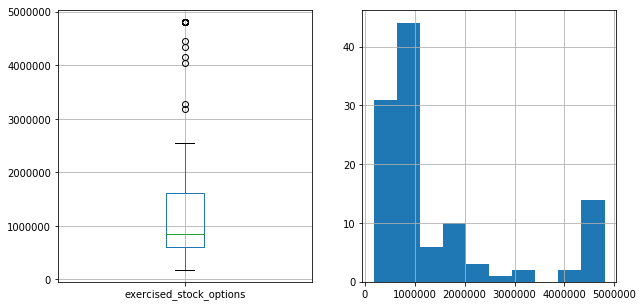

count      113.000000
mean     42866.479646
std      21130.646452
min      10384.800000
25%      29336.000000
50%      41953.000000
75%      50080.000000
max      83140.800000
Name: expenses, dtype: float64



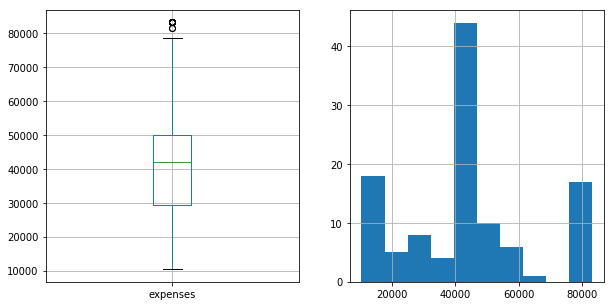

count    113.000000
mean     152.311504
std      284.239081
min       18.000000
25%       40.000000
50%       45.000000
75%       59.000000
max      953.600000
Name: from_messages, dtype: float64



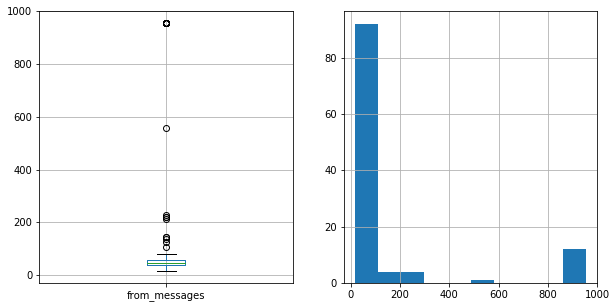

count    113.000000
mean      38.964602
std       34.814213
min        4.600000
25%       24.000000
50%       28.000000
75%       37.000000
max      121.400000
Name: from_poi_to_this_person, dtype: float64



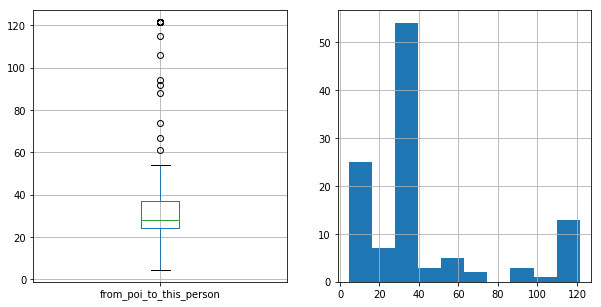

count    113.000000
mean      12.306195
std       15.064530
min        0.000000
25%        5.000000
50%        7.000000
75%       11.000000
max       48.800000
Name: from_this_person_to_poi, dtype: float64



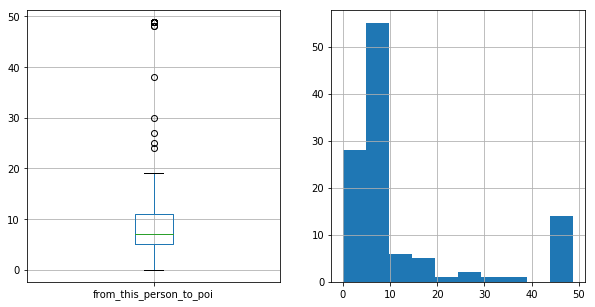

count         113.0
mean     40962500.0
std             0.0
min      40962500.0
25%      40962500.0
50%      40962500.0
75%      40962500.0
max      40962500.0
Name: loan_advances, dtype: float64



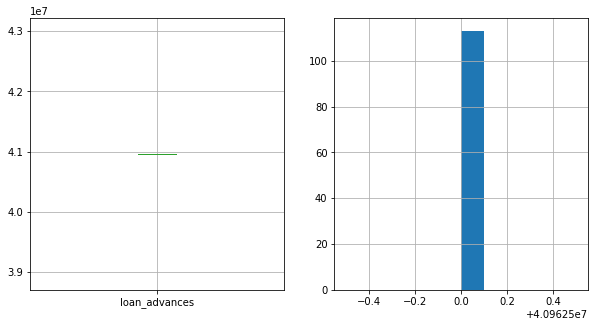

count       113.000000
mean     473934.037168
std      191772.817772
min      275000.000000
25%      422158.000000
50%      422158.000000
75%      422158.000000
max      953038.600000
Name: long_term_incentive, dtype: float64



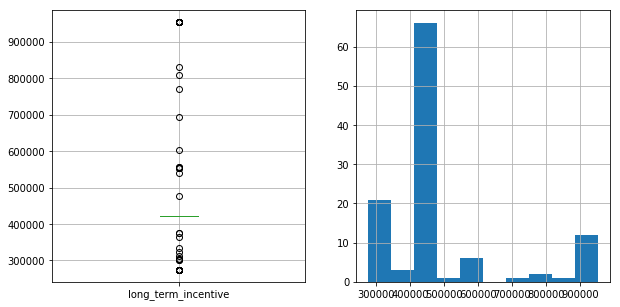

count       113.000000
mean     112481.330973
std      146895.899862
min         706.600000
25%        3083.000000
50%       52382.000000
75%      111122.000000
max      427178.600000
Name: other, dtype: float64



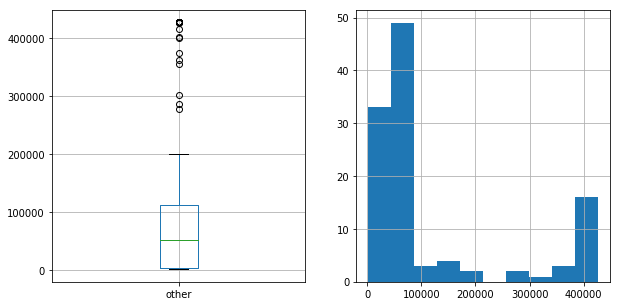

count    1.130000e+02
mean     6.722431e+05
std      5.607458e+05
min      1.670898e+05
25%      3.780820e+05
50%      4.628225e+05
75%      6.982420e+05
max      1.991695e+06
Name: restricted_stock, dtype: float64



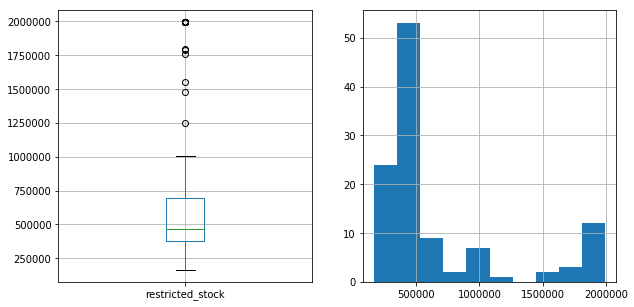

count       113.0
mean    -139856.5
std           0.0
min     -139856.5
25%     -139856.5
50%     -139856.5
75%     -139856.5
max     -139856.5
Name: restricted_stock_deferred, dtype: float64



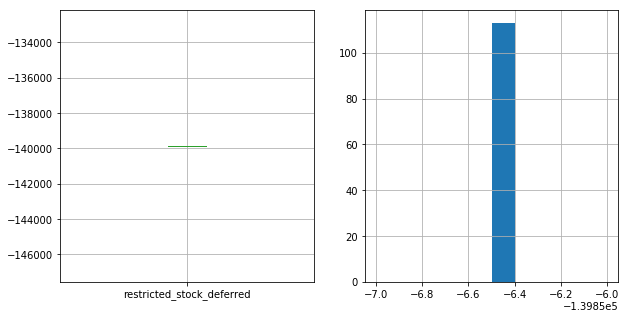

count       113.000000
mean     253728.732743
std       43359.715792
min      182775.800000
25%      239502.000000
50%      251654.000000
75%      265214.000000
max      337539.600000
Name: salary, dtype: float64



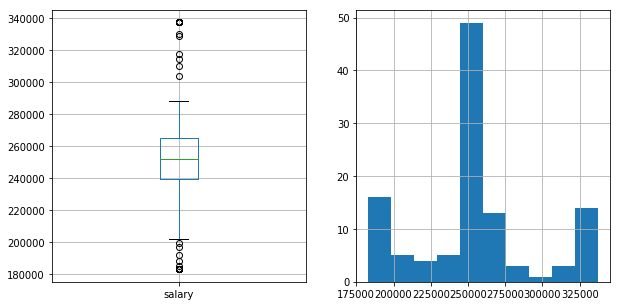

count     113.000000
mean      817.982301
std       678.551556
min       114.000000
25%       552.000000
50%       599.000000
75%       742.000000
max      2315.000000
Name: shared_receipt_with_poi, dtype: float64



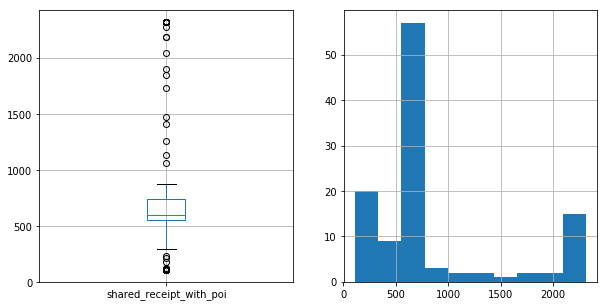

count     113.000000
mean     1364.969912
std       902.216415
min       386.400000
25%       898.000000
50%      1088.000000
75%      1433.000000
max      3307.400000
Name: to_messages, dtype: float64



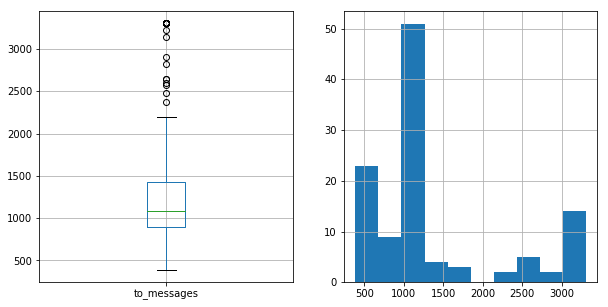

count    1.130000e+02
mean     1.261585e+06
std      9.304128e+05
min      8.549200e+04
25%      5.050500e+05
50%      1.106740e+06
75%      1.747522e+06
max      3.087920e+06
Name: total_payments, dtype: float64



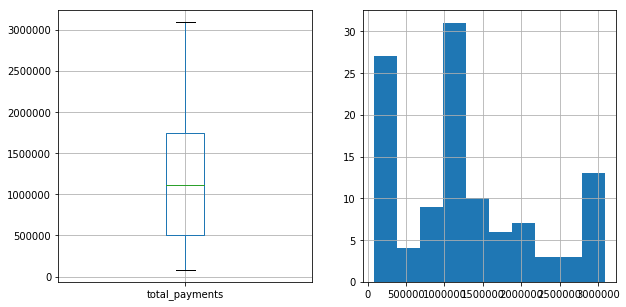

count    1.130000e+02
mean     1.949174e+06
std      2.114540e+06
min      1.957944e+05
25%      5.117340e+05
50%      9.979710e+05
75%      2.072035e+06
max      6.573716e+06
Name: total_stock_value, dtype: float64



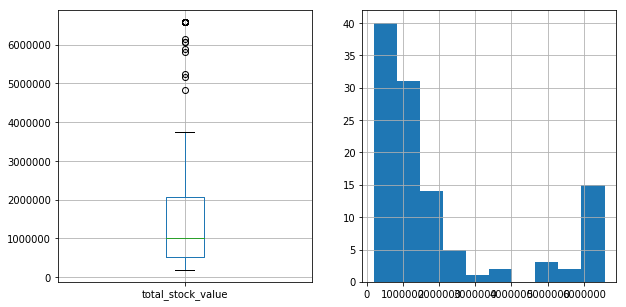

In [15]:
# 再次檢測是否還有 Outlier
for col in val_data.columns:
    print(f'{val_data[col].describe()}\n')
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    val_data.boxplot(col)
    plt.subplot(1, 2, 2)
    val_data[col].hist()
    plt.show()

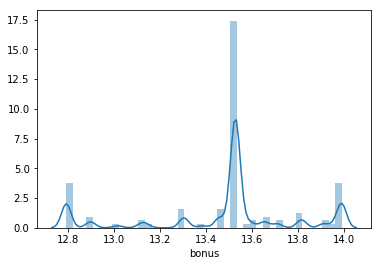

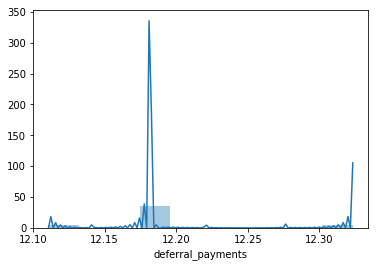

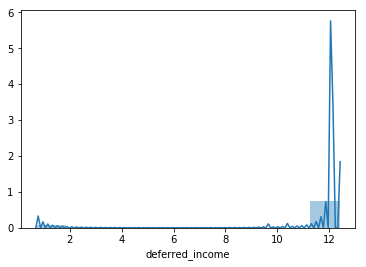

/home/james/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/james/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


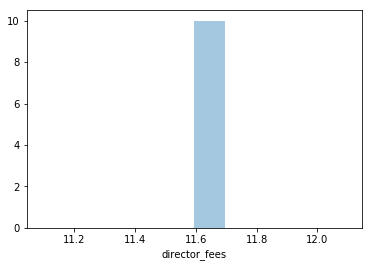

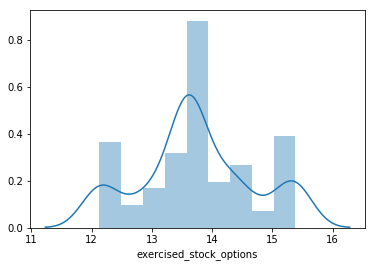

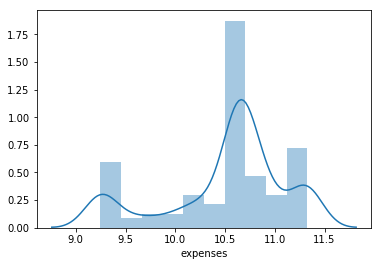

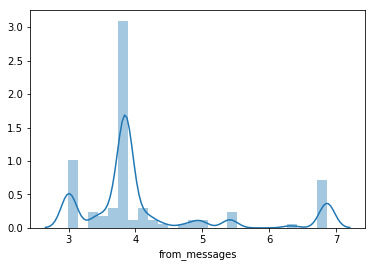

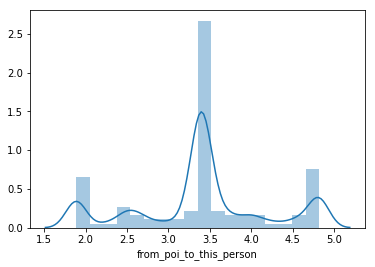

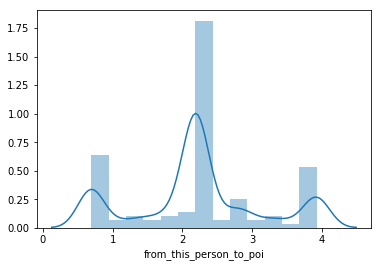

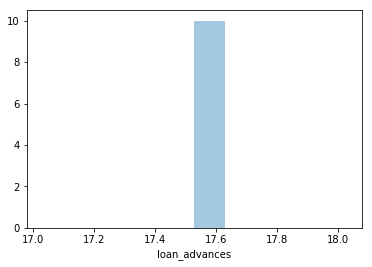

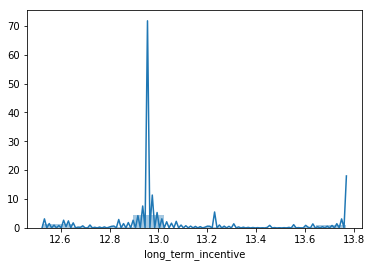

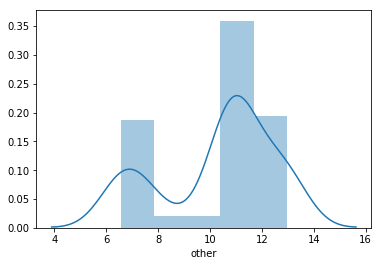

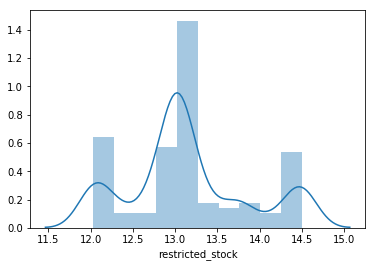

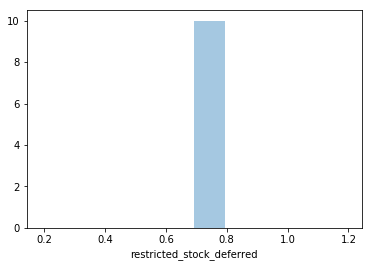

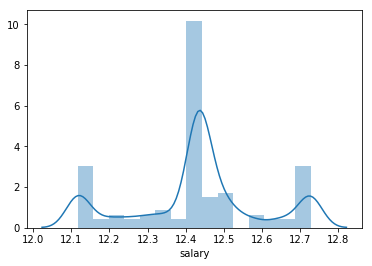

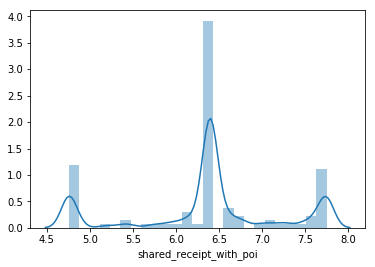

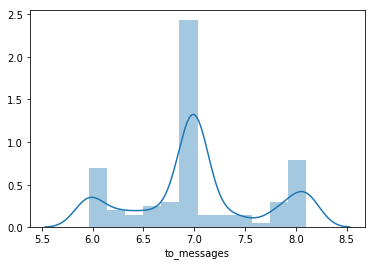

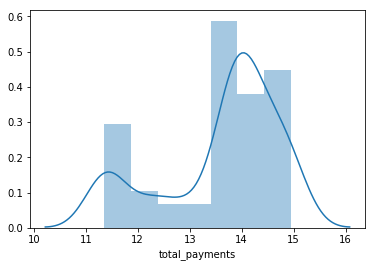

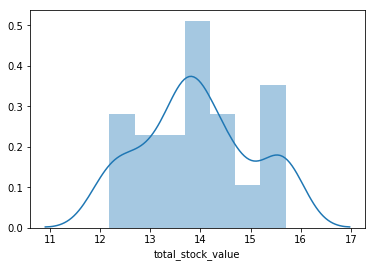

In [16]:
from scipy import stats
import seaborn as sns
import copy

# 正規化
val_fixed = copy.deepcopy(val_data)


# 調整數值範圍，避免出現負值
for col in val_fixed.columns:
    if val_fixed[col].min() < 0:
        val_fixed[col] += np.abs(val_fixed[col].min())
#         print(f'{val_fixed[col].describe()}\n')

# 使用 Log 去除偏態        
for col in val_fixed.columns:
    val_fixed[col] += 1
    val_fixed[col] = np.log1p(val_fixed[col])
    sns.distplot(val_fixed[col])
    plt.show()

In [17]:
# 驗證數值型資料後是否有改善資料分佈
print(f'Logistic Regression score: {cross_val_score(LogRes, val_fixed, train_Y, cv=5).mean()}')

Logistic Regression score: 0.8766798418972332


/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [18]:
for col in str_data.columns:
    val_fixed[col] = str_data[col]

val_fixed.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,...,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name,email_address
0,13.989466,12.181739,0.693147,11.595252,15.384704,10.756881,2.995732,3.784190,1.791759,17.528168,...,12.071632,14.504498,0.693147,12.729444,6.763885,6.810142,13.132417,15.698590,0,1
1,13.989466,12.181739,12.092165,11.595252,15.384704,10.286639,4.700480,4.499810,3.465736,17.528168,...,10.004418,14.504498,0.693147,12.729444,7.622664,8.104522,14.943009,15.698590,1,0
2,12.793865,12.181739,12.421192,11.595252,14.300648,10.038281,3.713572,2.708050,2.772589,17.528168,...,12.964962,13.675354,0.693147,12.263615,4.753590,5.962036,14.510599,14.729245,2,0
3,13.592370,12.181739,12.092165,11.595252,13.653006,11.328315,3.850148,3.401197,2.197225,17.528168,...,12.964962,13.800431,0.693147,12.320771,6.398595,6.993933,14.791056,13.800431,0,3
4,13.989466,12.181739,10.419360,11.595252,13.653006,10.486262,4.983607,4.815431,3.295837,17.528168,...,6.563291,12.026299,0.693147,12.389190,7.691657,7.863267,14.309779,12.184831,3,3


In [19]:
# 測試資料 Outlier 處理(用中位數處理)
for col in test_data.columns:
    if test_data[col].dtype == np.float64 or test_data[col].dtype == np.int64:
        test_q_50 = np.percentile(test_data[~test_data[col].isnull()][col], q=50)
        test_data.loc[test_data[col].isnull(), col] = test_q_50

name_data = test_data['name']
# 類別型資料使用 Hash 處理
for col in test_data.columns:
    if test_data[col].dtype == np.object:
        test_data[col] = test_data[col].map(lambda x : hash(x) % 5)

test_data.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,0,5249999.0,2144013.0,-2334434.0,118324.0,4,953136.0,17355.0,484.0,228.0,...,42962500.0,461912.0,210698.0,157569.0,-223782.5,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,1,1350000.0,564348.0,-833.0,118324.0,4,2027865.0,65907.0,27.0,140.0,...,42962500.0,974293.0,1621.0,252055.0,-223782.5,278601.0,1593.0,1858.0,2669589.0,252055.0
2,2,1500000.0,564348.0,-3117011.0,118324.0,2,5538001.0,34039.0,32.0,32.0,...,42962500.0,1617011.0,11350.0,853064.0,-223782.5,243293.0,1035.0,1045.0,288682.0,6391065.0
3,3,3000000.0,564348.0,-235000.0,118324.0,2,2291113.0,86174.0,3069.0,66.0,...,42962500.0,1294981.0,1661.0,1323148.0,-223782.5,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,1,1000000.0,564348.0,-235000.0,118324.0,3,2027865.0,30674.0,49.0,58.0,...,42962500.0,350000.0,307895.0,2502063.0,-223782.5,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [20]:
x_train = val_fixed
y_train = train_Y
x_test = test_data

clf = GradientBoostingRegressor()

learning_rate = np.arange(0.1, 0.5, 0.1)
n_estimators = np.arange(100, 20, -20)
max_depth = np.arange(3, 12, 3)

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

# ## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1)

# # 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)
# print('best estimator RandomForest:',grid_search.best_estimator_,'Best Score', grid_result.best_estimator_.score(x_train,y_train))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/james/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    2.1s finished
/home/james/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
from sklearn.model_selection import cross_val_score

gd_best = grid_search.best_estimator_

gd_best.fit(x_train,y_train)

print('Accuracy for Random Forest :',cross_val_score(gd_best,x_train,y_train,cv=10,scoring='neg_mean_squared_error').max())

Accuracy for Random Forest : -0.01837623271215104


In [22]:
gd_best_pred = pd.DataFrame(gd_best.predict(x_test))
gd_best_pred.index += 1

gd_best_pred.columns = ['poi']
tmp = list(name_data)
gd_best_pred['name'] = tmp
gd_best_pred = gd_best_pred[['name', 'poi']]

gd_best_pred.to_csv('Submission_ML_new_3.csv', index=False)